<b><u>Data Dictionary

Ticket #: Ticket number assigned to each complaint

Customer Complaint: Description of complaint

Date: Date of complaint

Time: Time of complaint

Received Via: Mode of communication of the complaint

City: Customer city

State: Customer state

Zipcode: Customer zip

Status: Status of complaint

Filing on behalf of someone

<b><u>Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('C:/Users/sathi/Downloads/1568699544_comcast_telecom_complaints_data/Comcast_telecom_complaints_data.csv')

In [28]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


<b><u>Data Analysis</b></u><br>
        We'll clean the data, analyse and then perform feature engineering on the resultant raw data and transform into a clean dataset,then we'll move onto the feature selection.



<b>1. Missing Values

In [5]:
# Columns with null values
[column for column in df.columns if sum(df[column].isnull())>0 ]

[]

In [6]:
[column for column in df.columns if sum(df[column].isna())>0 ]

[]

There are no null and NA values in any of the columns

In [7]:
df['Date_month_year'].sort_values()

1416    04-Apr-15
1483    04-Apr-15
584     04-Apr-15
561     04-Apr-15
1892    04-Apr-15
          ...    
634     31-May-15
668     31-May-15
329     31-May-15
874     31-May-15
464     31-May-15
Name: Date_month_year, Length: 2224, dtype: object

In [8]:
for index in range(len(df)):
    df['month'] = df['Date_month_year'].sort_values()[index][3:6]

In [9]:
df['month'].nunique()

1

In [10]:
df.drop('month',axis=1,inplace=True)

In [11]:
df['Date_month_year']= pd.to_datetime(df['Date_month_year'],format='%d-%b-%y')

In [12]:
df['month'] = df['Date_month_year'].dt.month_name()

In [13]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


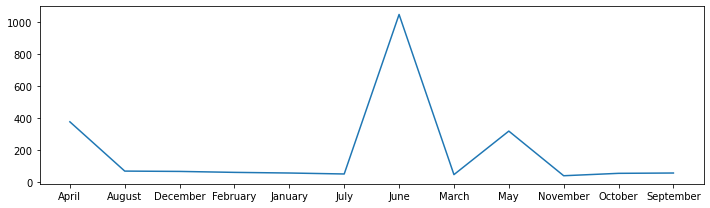

In [14]:
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(df.groupby('month')['Ticket #'].count())
fig.tight_layout()

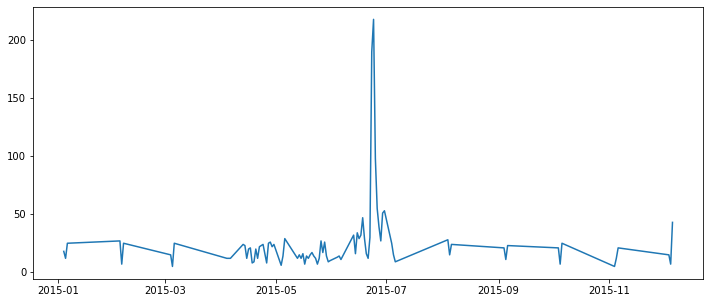

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df.groupby('Date_month_year')['Ticket #'].count())

In [16]:
complaint_types = pd.DataFrame(df['Customer Complaint'].value_counts())

In [17]:
complaint_types.reset_index(inplace=True)

In [18]:
complaint_types.rename(columns={'index':'Complaint Type','Customer Complaint':'Count'},inplace=True)

In [19]:
complaint_types.head()

,Complaint Type,Count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11


In [35]:
df['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

In [33]:
df.loc[(df['Status'] == 'Solved') | (df['Status'] == 'Closed'), 'Status'] = 'Closed'  

In [34]:
df.loc[(df['Status']=='Open') | (df['Status']=='Pending'),'Status'] = 'Open'

In [68]:
df.groupby('State')['Status'].value_counts().rename('Counts').reset_index()

,State,Status,Counts
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6
...,...,...,...
72,Virginia,Open,11
73,Washington,Closed,75
74,Washington,Open,23
75,West Virginia,Closed,8


In [23]:
new_df = pd.DataFrame(df.groupby('State')['Status'].value_counts())
new_df.head()

Status
State    Status        
Alabama  Closed      17
         Open         9
Arizona  Closed      14
         Open         6
Arkansas Closed       6

In [24]:
df.groupby('State')['Status'].value_counts()

State          Status
Alabama        Closed    17
               Open       9
Arizona        Closed    14
               Open       6
Arkansas       Closed     6
                         ..
Virginia       Open      11
Washington     Closed    75
               Open      23
West Virginia  Closed     8
               Open       3
Name: Status, Length: 77, dtype: int64

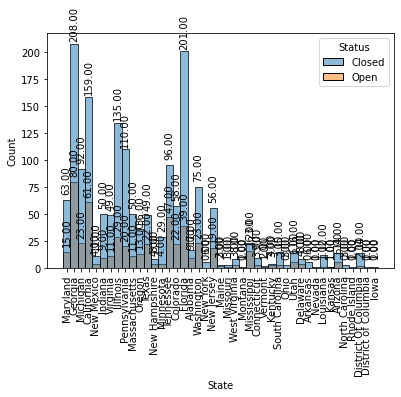

<Figure size 7200x1440 with 0 Axes>

In [124]:
ax = sns.histplot(data=df,x='State',hue='Status',binwidth=3)
plt.tight_layout()
plt.xticks(rotation=90)
plt.figure(figsize=(100,20))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', rotation=90, xytext=(0, 20), textcoords='offset points')  #vertical bars
plt.tight_layout()

Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
Which state has the maximum complaints Which state has the highest percentage of unresolved complaints

Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [134]:
print((df.groupby('State')['Status'].count()).idxmax(),'is the state with maximum complaints')

Georgia is the state with maximum complaints


In [228]:
df[df['Status']=='Open']['State'].value_counts().sort_values(ascending = False).head()

Georgia       80
California    61
Tennessee     47
Florida       39
Illinois      29
Name: State, dtype: int64

In [227]:
print(((df[df['Status']=='Open']['State'].value_counts().sort_values(ascending = True)/df['State'].value_counts())*100).sort_values(ascending=False).idxmax(), ' has the highest % of Open Tickets')

Kansas  has the highest % of Open Tickets


<b>Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [221]:
print(np.round((len(df[(df['Received Via']=='Customer Care Call') & (df['Status']=='Closed')])/len((df[df['Status']=='Closed'])))*100),'% of Complaints that were resolved was received through Customer Care Call')

51.0 % of Complaints that were resolved was received through Customer Care Call


In [225]:
print(np.round(len(df[(df['Received Via']=='Internet') & (df['Status']=='Closed')])/len((df[df['Status']=='Closed']))*100),'% of Complaints that were resolved was received through Internet')

49.0 % of Complaints that were resolved was received through Internet
